# Setting

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

## Portfolios
*Review portfolio settings*

In [4]:
PM.review('portfolio')

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [5]:
PM.review_portfolio('WTR_2412')

{'strategy': 'WTR',
 'universe': 'UV_WTR',
 'file': 'pf_wtr2412_static',
 'path': 'transaction'}

In [6]:
#PM.review_strategy('WTR')
PM.review_portfolio('WTR_2412', strategy=True)

{'method_select': 'Selected', 'method_weigh': 'Equally'}

In [7]:
#PM.review_universe('UV_WTR')
PM.review_portfolio('WTR_2412', universe=True)

{'universe': 'etf',
 'file': 'etfs_weather',
 'tickers': 'ETF/KR',
 'to_daily': False,
 'path': 'data'}

In [8]:
c = PM.get_cost('UV_WTR', file_cost, path_tran)
c['buy']

Cost data transaction_cost_241217.csv loaded


ticker
069500    0.004209
273130    0.004209
379800    0.004209
411060    0.004209
148070    0.004209
284430    0.004209
Name: buy, dtype: float64

# Universe

In [9]:
PM.review('universes')

Universe: UV_K200, UV_KRX, UV_LIQ, UV_WTR, UV_ETF, UV_FUND, UV_FCTR


In [10]:
WidgetUniverse

## K200

In [11]:
k200 = PM.create_universe('UV_K200')

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


In [12]:
#k200.portfolio_data
#k200.get_names()

In [12]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1)
)
k200.download(**kw) if WidgetUniverse.values(0) else None

... done
200 securities from 2022-01-03 to 2025-02-05 downloaded.
kospi200_prices_250205.csv saved
df_prices updated
Execution time of download: 27.78 secs


## KRX

In [32]:
krx = PM.create_universe('UV_KRX')

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded


In [15]:
#krx.get_names()

In [16]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
#krx.download(**kw) if WidgetUniverse.values(0) else None

## WTR

In [15]:
wtr = PM.create_universe('UV_WTR')

6 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded


In [16]:
wtr.get_names('selected')

0) 069500: KODEX 200
1) 379800: KODEX 미국S&P500
2) 273130: KODEX 종합채권(AA-이상)액티브
3) 411060: ACE KRX금현물
4) 148070: KIWOOM 국고채10년
5) 284430: KODEX 200미국채혼합

In [17]:
#PM.review_universe('UV_WTR')

In [18]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    #tickers = ['069500', '273130', '148070', '379800', '411060', '284430']
    tickers = 'selected'
)
wtr.download(**kw) if WidgetUniverse.values(0) else None

... done
6 securities from 2022-01-03 to 2025-02-03 downloaded.
etfs_weather_250203.csv saved
df_prices updated
Execution time of download: 0.55 secs


In [21]:
#wtr.save()

## FCTR

In [73]:
fctr = PM.create_universe('UV_FCTR')

7 securities from 2021-01-04 to 2024-11-22 uploaded.
Price data loaded


In [74]:
fctr.get_names()

0) LRGF: iShares U.S. Equity Factor ETF
1) MTUM: iShares MSCI USA Momentum Factor ETF
2) QUAL: iShares MSCI USA Quality Factor ETF
3) SIZE: iShares MSCI USA Size Factor ETF
4) SPY: SPDR S&P 500 ETF Trust
5) USMV: iShares MSCI USA Min Vol Factor ETF
6) VLUE: iShares MSCI USA Value Factor ETF

In [75]:
kw = dict(
    n_years=3, 
    close_today = WidgetUniverse.values(1),
    tickers=['LRGF','MTUM','QUAL','SIZE','SPY','USMV','VLUE']
    #tickers='selected'
)
fctr.download(**kw) if WidgetUniverse.values(0) else None

[*********************100%***********************]  7 of 7 completed

... done
7 securities from 2021-01-04 to 2024-12-13 downloaded.
etfs_factors_241213.csv saved
df_prices updated
Execution time of download: 1.38 secs


## FUND

In [14]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [15]:
kw = dict(
    n_years=20, 
    #close_today = WidgetUniverse.values(1),
    #tickers='selected',
    overwrite_master=False
)
fund.download(**kw) if WidgetUniverse.values(0) else None

100%|█████████████████████████████████████████████████████████████| 160/160 [00:23<00:00,  6.95it/s]


23.0 secs elapsed, 0.4 secs paused (1.7%)


100%|█████████████████████████████████████████████████████████████| 160/160 [00:12<00:00, 12.94it/s]


12.4 secs elapsed, 0.2 secs paused (1.6%)
funds_info_250207.csv saved
224 tickers set to download


100%|█████████████████████████████████████████████████████████████| 224/224 [00:26<00:00,  8.41it/s]


26.7 secs elapsed, 0.5 secs paused (1.9%)
Max error of conversions: 1.16e-02
... done
224 securities from 2005-01-31 to 2025-01-31 downloaded.
funds_prices_250131.csv saved
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
df_prices updated
Execution time of download: 64.68 secs


In [8]:
#_ = fund.save()

funds_prices_250131.csv saved


In [16]:
#fund.portfolio_data['universe']

### Case: Cost
*check [Additional Data](#Additional-Data) to update cost data (file_cost)*

In [24]:
universe = 'UV_FUND'
fund = PM.create_universe(universe)
cost = PM.get_cost(universe, file=file_cost, path=path_tran)
fee = cost['fee']

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_250207.csv loaded


In [35]:
import random
#tickers = [k for k,v in fund.security_names.items() if 'TDF2045' in v]
tickers = random.sample(list(fund.security_names.keys()), 3)
#tickers = ['K55301BU5479', 'K55234DF2988', 'K55223BT1757']
fund.get_names(tickers)

0) K55232C70460: NH-Amundi글로벌혁신기업증권자투자신탁(UH)[주식]ClassC-P1e
1) K55301CQ5219: 미래에셋친디아컨슈머증권투자신탁 1(주식)종류C-Pe
2) K55307BC6945: 유리베트남알파연금저축증권자투자신탁[주식]_C/C-e

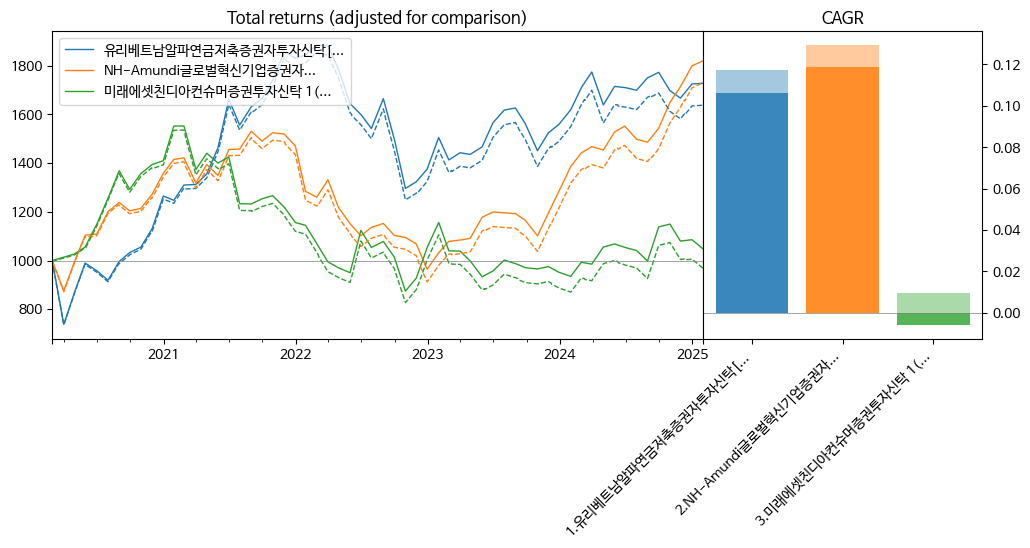

In [36]:
fund.plot(tickers, fee=fee, base=1000)

## LIQ

In [17]:
# portfolio of past trading system to liquidate soon
selected = [
    '011780', '066570', '035890', '040420', '140520', 
    '072990', '091580', '011200', '002220', '006650', 
    '136490', '064550', '460860', '040910', '024950',
    '900070', '036580', '184230', '460850', '016250',
    '001230', '049470', '217820', '109960'
]

In [18]:
liq = PM.create_universe('UV_LIQ')

24 securities from 2022-01-03 to 2025-01-31 uploaded.
Price data loaded


In [19]:
#liq.get_names()

In [20]:
kw = dict(
    n_years=3, 
    tickers= 'selected', #selected,
    close_today = WidgetUniverse.values(1),
    interval=5, pause_duration=1, msg=False
)
liq.download(**kw) if WidgetUniverse.values(0) else None

REMINDER: 24 tickers set regardless of market


100%|███████████████████████████████████████████████████████████████| 24/24 [00:01<00:00, 18.25it/s]

1.3 secs elapsed, 0.0 secs paused (0.0%)
... done
24 securities from 2022-01-03 to 2025-02-03 downloaded.
krx_liq_prices_250203.csv saved
df_prices updated
Execution time of download: 1.93 secs


## Additional Data

### Cost

*Check missing cost data*

In [21]:
_ = PM.check_cost('UV_FUND', file_cost, path_tran)

Cost data transaction_cost_241217.csv loaded
224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
ERROR: 160 tickers missing cost data


*Update cost data for uiniverse UV_FUND, except for which of universes updated with manual editting*

In [23]:
fd = FundDownloader.create(fund)
#fd.export_cost('UV_FUND', 'transaction_cost', path=path_tran, update=True)
fd.export_cost('UV_FUND')

Data for 224 funds loaded.
Cost data transaction_cost_241217.csv loaded
Cost data saved to transaction_cost_250207.csv


### Financial Ratio

In [23]:
WidgetUniverse

In [24]:
file = 'kospi200_ratios.csv'
fr = FinancialRatios(file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-01-03 loaded


In [25]:
start_fr = '2023-01-01'
universe = 'UV_K200'
freq = 'day'

if WidgetUniverse.values(0):
    tickers = PM.create_universe(universe).df_prices.columns.to_list()
    kw = dict(
        freq = freq,
        close_today = WidgetUniverse.values(1)
    )
    fr.download(tickers, start_fr, **kw)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded


100%|█████████████████████████████████████████████████████████████| 200/200 [13:12<00:00,  3.96s/it]


13.2 mins elapsed, 30.0 secs paused (3.8%)
Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 downloaded
kospi200_ratios_250203.csv saved


In [26]:
fratio = 'PER'
df_ratio = fr.util_reshape(fratio, stack=False)

In [27]:
df = PM.create_universe(universe).df_prices
fr.util_compare_periods(df)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Ratio: 2023-01-02 ~ 2025-02-03
Price: 2022-01-03 ~ 2025-02-03


# Performance

In [4]:
PM.review()

Portfolio: MMT_2407, PER_2410, WTR_2407, WTR_2412, LIQ, TDF_2406, HANA_2408, FCTR, TEST


In [5]:
pf_list = ['MMT_2407', 'PER_2410', 'WTR_2407', 'WTR_2412']
pm = PM(pf_list)

MMT_2407:
200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Transaction record to 2025-01-16 loaded

PER_2410:
200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets

WTR_2407:
6 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Transaction record to 2024-11-20 loaded

WTR_2412:
6 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Transaction record to 2024-12-18 loaded



In [6]:
#pm.load('LIQ')
pm.load(['TDF_2406','HANA_2408'])

TDF_2406:
64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2025-01-15 loaded

HANA_2408:
64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Transaction record to 2024-08-01 loaded



security_names updated
Data of tickers 009900, 016380 downloaded


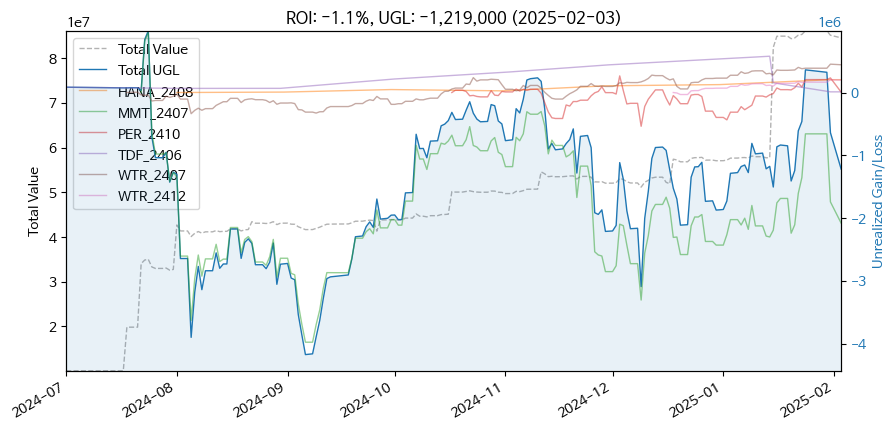

In [7]:
start_date='2024-07-01'
#pm.plot('MMT', start_date=start_date)
#pm.plot(pf_list, start_date=start_date)
pm.plot(start_date=start_date, roi=False)

In [8]:
w_date

DatePicker(value=None, layout=Layout(width='200px'), step=1)

In [11]:
pm.summary(date=w_date.value)

,MMT_2407,PER_2410,WTR_2407,WTR_2412,TDF_2406,HANA_2408,TOTAL
start,2024-07-22,2024-10-17,2024-07-18,2024-12-18,2024-06-19,2024-08-01,2024-06-19
end,2025-02-03,2025-02-03,2025-02-03,2025-02-03,2025-01-31,2025-01-31,2025-02-03
buy,"42,593,500","12,249,820","10,049,835","5,783,200","35,000,000","9,990,000","115,666,355"
sell,"26,824,951","2,621,865","437,755",0.0,0.0,0.0,"29,884,571"
value,"13,688,500","9,634,330","10,054,403","5,980,459","35,010,787","10,194,581","84,563,060"
ugl,"-2,080,049","6,375","442,323","197,259","10,787","204,581","-1,218,724"
roi,-0.048835,0.00052,0.044013,0.034109,0.000308,0.020479,-0.010537


*print summary for google sheet 금융자산운용*

In [10]:
pm.util_print_summary(date=w_date.value)

2025-02-03, MMT, 2407, , , , 평가, , 42593500, 26824951, 13688500, -2080049, -0.048834892647939276
2025-02-03, PER, 2410, , , , 평가, , 12249820, 2621865, 9634330, 6375, 0.0005204158101914658
2025-02-03, WTR, 2407, , , , 평가, , 10049835, 437755, 10054403, 442323, 0.044012961406828977
2025-02-03, WTR, 2412, , , , 평가, , 5783200, 0.0, 5980459, 197259, 0.034108970812007255
2025-01-31, TDF, 2406, , , , 평가, , 35000000, 0.0, 35010787, 10787, 0.00030820000000009173
2025-01-31, HANA, 2408, , , , 평가, , 9990000, 0.0, 10194581, 204581, 0.0204785785785786


# Transaction

## MMT

In [36]:
pf_mmt = PM.create_portfolio('MMT_2407', **kw_cost) 

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-16 loaded


In [37]:
# run after editting record file
pf_mmt.update_record()

In [38]:
pf_mmt.view_record(-2, nshares=False)

name     ratio  transaction      net  weight  \
date       ticker                                                        
2024-12-16 267260     HD현대일렉트릭  0.975610      -389500  2726500     0.2   
           010130         고려아연  1.000858      2330000  2330000     0.2   
           003230         삼양식품  1.000000     -1458000  2187000     0.2   
           000150           두산  0.963303      2725000  2725000     0.2   
           298040        효성중공업  0.985808      2290000  2290000     0.2   
           012450    한화에어로스페이스  1.040650     -2152501        0     0.0   
           064350         현대로템  1.026943     -2316000        0     0.0   
           079550       LIG넥스원  1.004130     -2130700        0     0.0   
2025-01-16 267260     HD현대일렉트릭  1.000000            0  2922500     0.2   
           003230         삼양식품  1.000000            0  2310000     0.2   
           000150           두산  1.000000            0  2880000     0.2   
           012450    한화에어로스페이스  1.031414      2673999  2674000     0.2   
           010120  LS ELECTRIC  0.899535      3225000  3225000     0.2   
           010130         고려아연  0.957796     -1706000        0     0.0   
           298040        효성중공업  0.997872     -2350000        0     0.0   

                   weight*      date*  
date       ticker                      
2024-12-16 267260    0.222 2024-12-17  
           010130    0.190 2024-12-17  
           003230    0.178 2024-12-17  
           000150    0.222 2024-12-17  
           298040    0.187 2024-12-17  
           012450    0.000 2024-12-17  
           064350    0.000 2024-12-17  
           079550    0.000 2024-12-17  
2025-01-16 267260    0.209 2025-01-17  
           003230    0.165 2025-01-17  
           000150    0.206 2025-01-17  
           012450    0.191 2025-01-17  
           010120    0.230 2025-01-17  
           010130    0.000 2025-01-17  
           298040    0.000 2025-01-17

*daily transactions for book keeping*

In [39]:
pf_mmt.get_cash_history(cumsum=False, date_actual=True)

,buy,sell
date*,,
2024-07-22,14255518,0
2024-08-22,6159324,4321649
2024-09-26,0,2819812
2024-09-27,2825103,0
2024-10-08,3072111,3348589
2024-11-11,3038510,3805898
2024-12-17,7345267,8431189
2025-01-17,5899213,4048551


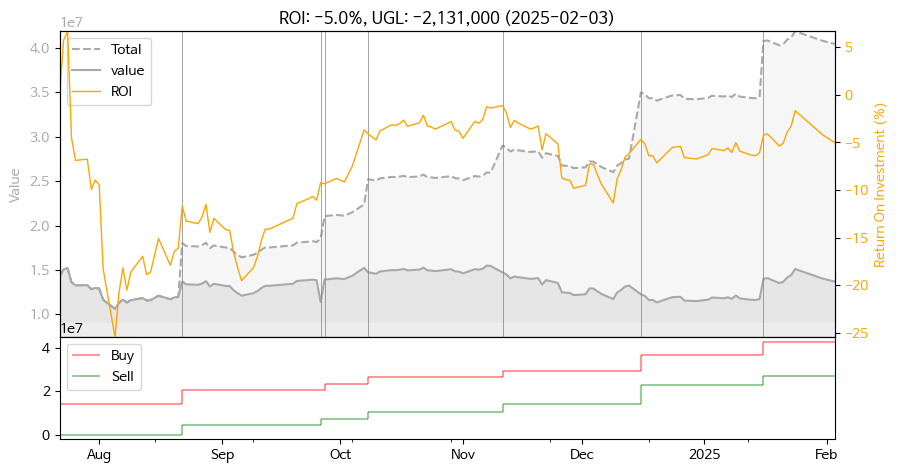

In [40]:
pf_mmt.plot()

In [42]:
date = None
#date = '2025-01-17'
pf_mmt.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-22, 2025-02-03, 42595050, 26775690, 13688500, -2130860, -0.05002601133430373


start    2024-07-22
end      2025-02-03
buy      42,595,050
sell     26,775,690
value    13,688,500
ugl      -2,130,860
roi       -0.050026
dtype: object

In [40]:
#pf_mmt.valuate(date, total=False)

In [41]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [42]:
kw = dict(
    #halt = ['079550'],
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_mmt.transaction_halt(**kw) 

Updated with transaction on 2025-02-03
Set save=True to save transaction record
ROI: -4.2%, UGL: -1,807,860 (2025-02-03)


In [43]:
kw = dict(
    nshares = True,
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
)

_ = pf_mmt.transaction_pipeline(**kw)

5 tickers selected by Total return from 2024-01-29 to 2025-01-24
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 7 %
ROI: -5.0%, UGL: -2,133,546 (2025-02-03)
Set save=True to save transaction record


In [44]:
pf_mmt.view_record(-2, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                           
2025-01-16 000150           두산  288000            0   10     0.2    0.206   
           003230         삼양식품  770000            0    3     0.2    0.165   
           010120  LS ELECTRIC  215000           15   15     0.2    0.230   
           010130         고려아연  853000           -1    0     0.0    0.000   
           012450    한화에어로스페이스  382000            6    7     0.2    0.191   
           267260     HD현대일렉트릭  417500            0    7     0.2    0.209   
           298040        효성중공업  470000           -5    0     0.0    0.000   
2025-02-03 000150           두산  265000            0   10     0.2    0.217   
           003230         삼양식품  708000            0    3     0.2    0.174   
           010120  LS ELECTRIC  220500           -3   12     0.2    0.216   
           012450    한화에어로스페이스  392500           -1    6     0.2    0.193   
           267260     HD현대일렉트릭  408500           -1    6     0.2    0.200   

                       date*  
date       ticker             
2025-01-16 000150 2025-01-17  
           003230 2025-01-17  
           010120 2025-01-17  
           010130 2025-01-17  
           012450 2025-01-17  
           267260 2025-01-17  
           298040 2025-01-17  
2025-02-03 000150 2025-02-03  
           003230 2025-02-03  
           010120 2025-02-03  
           012450 2025-02-03  
           267260 2025-02-03

## KRX
*simulation*

In [48]:
pf_krx = PM.create_portfolio('KRX', **kw_cost)

2712 securities from 2019-01-02 to 2024-10-08 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
REMINDER: make sure this is 1st transaction as no records provided


In [20]:
pf_krx.view_record(-2)

No transaction record imported


In [21]:
pf_krx.valuate()

In [22]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [23]:
kwargs_trs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)

_ = pf_krx.transaction_pipeline(**kwargs_trs)
pf_krx.view_record(-2)

Liquidation set to None
5 tickers selected by Total return from 2023-08-02 to 2024-08-02
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: -3.7%, UGL: -364,000  (2024-10-08)
Set save=True to save transaction record


name  ratio  transaction      net  weight  weight*  \
date       ticker                                                         
2024-09-02 078860  엔에스이엔엠      1      1998150  1998150     0.2    0.201   
           016670     디모아      1      1996800  1996800     0.2    0.201   
           033790      피노      1      1996750  1996750     0.2    0.201   
           159910   스킨앤스킨      1      1999880  1999880     0.2    0.202   
           196170    알테오젠      1      1932000  1932000     0.2    0.195   

                       date*  
date       ticker             
2024-09-02 078860 2024-09-02  
           016670 2024-09-02  
           033790 2024-09-02  
           159910 2024-09-02  
           196170 2024-09-02

## PER

In [43]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [44]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


*Set assets to liquidate as delisted from KOSPI200*

In [6]:
tickers_liq = pf_per.check_universe()

In [7]:
#pf_per.view_record(-2)

In [46]:
pf_per.valuate(total=True, print_msg=True, join_str=True)

Tickers 009900, 016380 added to universe
start, end, buy, sell, value, ugl, roi
2024-10-17, 2025-02-03, 12250266, 2617050, 9634330, 1114, 9.096726282442624e-05


start    2024-10-17
end      2025-02-03
buy      12,250,266
sell      2,617,050
value     9,634,330
ugl           1,114
roi        0.000091
dtype: object

In [9]:
#pf_per.update_record()
#pf_per.view_record(-2)

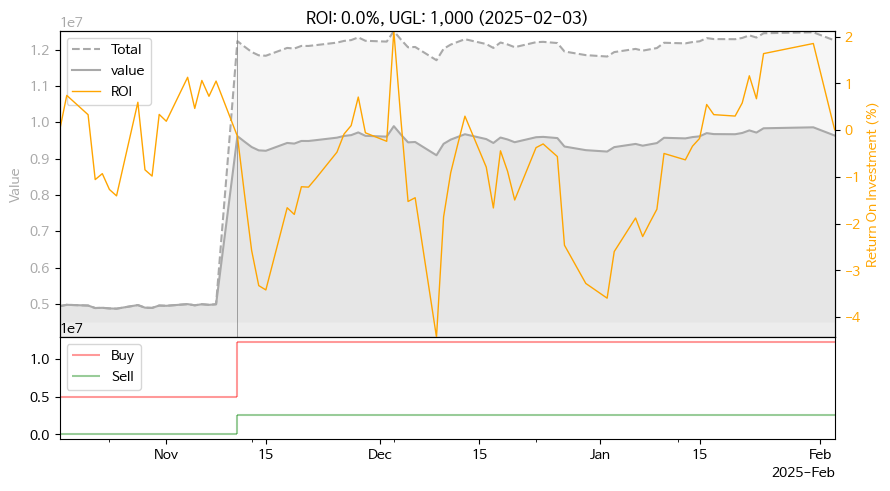

In [10]:
pf_per.plot()

In [9]:
start_fr = '2023-01-01'
_ = pf_per.check_additional(start_fr)

Returning missing tickers


In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [20]:
kw = dict(
    #sell = tickers_liq,
    halt = tickers_liq, # testing
    date = WidgetTransaction.values(0),
    save = WidgetTransaction.values(2),
)
_ = pf_per.transaction_halt(**kw) 
#pf_per.view_record(-1)

Trading of assets 009900, 016380 to halt
Updated with transaction on 2025-01-06
Set save=True to save transaction record
ROI: 2.0%, UGL: 215,013 (2025-02-03)


In [15]:
kw = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=True
)
_ = pf_per.transaction_pipeline(**kw)

20 tickers selected by Financial Ratio from 2024-12-03 to 2025-02-03
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 4 %
Tickers 009900, 016380 added to universe
ROI: 1.3%, UGL: 188,993 (2025-02-03)
Set save=True to save transaction record


In [21]:
pf_per.view_record(-1, nshares=True)

name   price  transaction  net  weight  weight*  \
date       ticker                                                       
2025-01-06 000270       기아  100500            0    4    0.05    0.054   
           001450     현대해상   25200            0   20    0.05    0.059   
           003030   세아제강지주  182500            0    2    0.05    0.045   
           005380      현대차  211500            0    1    0.05    0.049   
           005830   DB손해보험  103700            0    4    0.05    0.050   
           005850      에스엘   30200            0   16    0.05    0.058   
           009970  영원무역홀딩스   81000            0    5    0.05    0.050   
           010060   OCI홀딩스   73000            0    6    0.05    0.055   
           017800   현대엘리베이   49100            0    8    0.05    0.048   
           024110     기업은행   14450            0   35    0.05    0.059   
           047040     대우건설    3235            0  157    0.05    0.059   
           078930       GS   39350            0   12    0.05    0.058   
           088350     한화생명    2505            0  205    0.05    0.060   
           111770     영원무역   41500            0   11    0.05    0.056   
           138930  BNK금융지주   10400            0   49    0.05    0.060   
           139130  DGB금융지주    8210            0   63    0.05    0.060   
           241560     두산밥캣   43400            0   11    0.05    0.060   
           316140   우리금융지주   15430            0   33    0.05    0.060   

                       date*  
date       ticker             
2025-01-06 000270 2025-01-06  
           001450 2025-01-06  
           003030 2025-01-06  
           005380 2025-01-06  
           005830 2025-01-06  
           005850 2025-01-06  
           009970 2025-01-06  
           010060 2025-01-06  
           017800 2025-01-06  
           024110 2025-01-06  
           047040 2025-01-06  
           078930 2025-01-06  
           088350 2025-01-06  
           111770 2025-01-06  
           138930 2025-01-06  
           139130 2025-01-06  
           241560 2025-01-06  
           316140 2025-01-06

In [61]:
#pf_per.update_record()

## WTR
*modified all weather*

In [14]:
pf = 'WTR_2407'
#pf = 'WTR_2412' # 배현정
pf_wtr = PM.create_portfolio(pf, **kw_cost) 

6 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-20 loaded


In [53]:
#pf_wtr.portfolio_data['strategy']
#pf_wtr.update_record()

In [54]:
pf_wtr.view_record(-2, nshares=True)

name   price  transaction  net  weight  \
date       ticker                                                           
2024-12-18 069500             KODEX 200   32313           30   30  0.1667   
           379800      KODEX 미국S&P500TR   19475           50   50  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  116220            8    8  0.1667   
           411060            ACE KRX금현물   17120           57   57  0.1667   
           148070          KOSEF 국고채10년  114072            8    8  0.1667   
           284430        KODEX 200미국채혼합   12810           77   77  0.1667   

                   weight*      date*  
date       ticker                      
2024-12-18 069500    0.168 2024-12-19  
           379800    0.168 2024-12-19  
           273130    0.161 2024-12-19  
           411060    0.169 2024-12-19  
           148070    0.163 2024-12-19  
           284430    0.171 2024-12-19

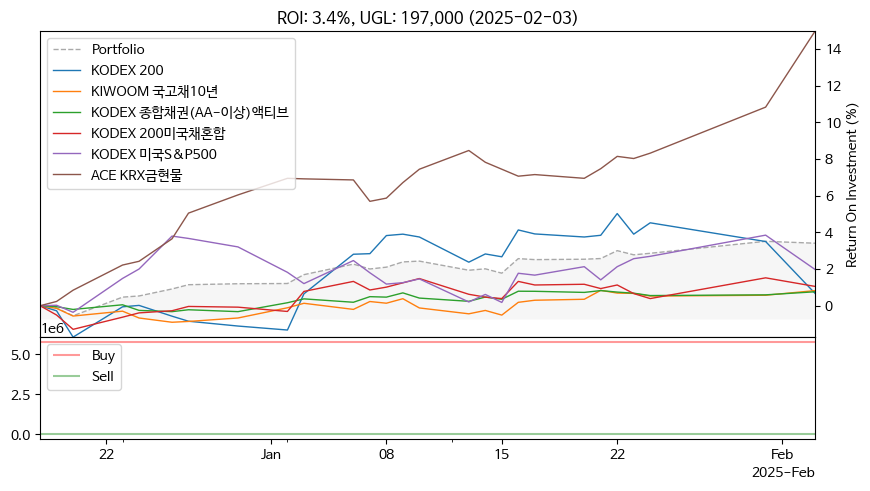

In [55]:
pf_wtr.plot(total=False)

In [15]:
date = None
pf_wtr.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-07-18, 2025-02-03, 10050258, 437605, 10054403, 441750, 0.04395412373814933


start    2024-07-18
end      2025-02-03
buy      10,050,258
sell        437,605
value    10,054,403
ugl         441,750
roi        0.043954
dtype: object

In [18]:
pf_wtr.valuate(total=False)

,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,
411060,2024-07-18,2025-02-03,"1,645,719","170,342","1,889,760","414,382",0.251794
379800,2024-07-18,2025-02-03,"1,646,949","150,269","1,707,960","211,279",0.128285
273130,2024-07-18,2025-02-03,"1,579,266",0.0,"1,639,470","60,204",0.038121
148070,2024-07-18,2025-02-03,"1,606,428","116,995","1,548,106","58,673",0.036524
284430,2024-07-18,2025-02-03,"1,725,218",0.0,"1,669,904","-55,314",-0.032062
069500,2024-07-18,2025-02-03,"1,846,678",0.0,"1,599,202","-247,476",-0.134011


In [79]:
#pf_wtr.performance(metrics=METRICS)

In [80]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [81]:
nshares = True
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2),
    nshares=nshares
)
_ = pf_wtr.transaction_pipeline(**kwargs)
pf_wtr.view_record(-2, nshares=nshares)

6 tickers selected by All from 2025-02-03 to 2025-02-03
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 1 %
ROI: 4.4%, UGL: 451,845 (2025-02-03)
Set save=True to save transaction record


name   price  transaction  net  weight  \
date       ticker                                                           
2024-11-20 069500             KODEX 200   32902            7   49  0.1670   
           148070          KOSEF 국고채10년  113034           -1   13  0.1670   
           273130  KODEX 종합채권(AA-이상)액티브  114815            0   14  0.1670   
           284430        KODEX 200미국채혼합   12585            4  128  0.1670   
           379800      KODEX 미국S&P500TR   18790           -8   86  0.1670   
           411060            ACE KRX금현물   17040          -10   96  0.1670   
2025-02-03 069500             KODEX 200   32530            1   51  0.1667   
           148070         KIWOOM 국고채10년  115015            0   14  0.1667   
           273130  KODEX 종합채권(AA-이상)액티브  117105            0   14  0.1667   
           284430        KODEX 200미국채혼합   12945            0  129  0.1667   
           379800        KODEX 미국S&P500   19860           -2   84  0.1667   
           411060            ACE KRX금현물   19685          -11   85  0.1667   

                   weight*      date*  
date       ticker                      
2024-11-20 069500    0.168 2024-11-20  
           148070    0.158 2024-11-20  
           273130    0.167 2024-11-20  
           284430    0.169 2024-11-20  
           379800    0.168 2024-11-20  
           411060    0.170 2024-11-20  
2025-02-03 069500    0.167 2025-02-03  
           148070    0.162 2025-02-03  
           273130    0.165 2025-02-03  
           284430    0.168 2025-02-03  
           379800    0.168 2025-02-03  
           411060    0.169 2025-02-03

## LIQ

In [12]:
pf_liq = PM.create_portfolio('LIQ', **kw_cost)

24 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-01-03 loaded


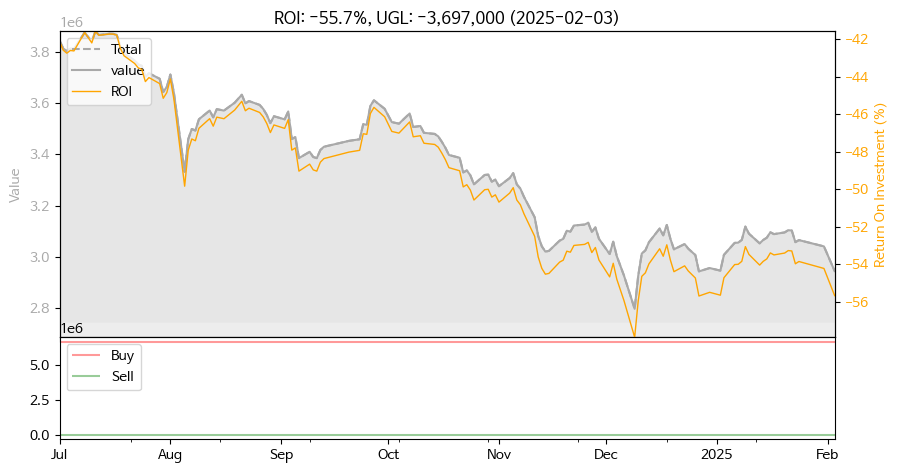

In [71]:
#date=None
date='2024-07-01'
pf_liq.plot(start_date=date)

In [13]:
pf_liq.valuate()

start    2024-01-03
end      2025-02-03
buy       6,642,320
sell            0.0
value     2,944,968
ugl      -3,697,352
roi       -0.556636
dtype: object

In [73]:
pf_liq.view_record()

name     ratio  transaction     net  weight  weight*  \
date       ticker                                                            
2024-01-03 011780     금호석유  0.750877       342000  342000     NaN    0.051   
           066570     LG전자  0.812245       245000  245000     NaN    0.037   
           035890     서희건설  0.760000       298800  298800     NaN    0.045   
           040420  정상제이엘에스  0.875784       294890  294890     NaN    0.044   
           140520     대창스틸  0.803077       292500  292500     NaN    0.044   
           072990    에이치시티  0.542767       286200  286200     NaN    0.043   
           091580    상신이디피  0.918452       302400  302400     NaN    0.046   
           011200      HMM  0.755977       289850  289850     NaN    0.044   
           002220     한일철강  0.768371       297350  297350     NaN    0.045   
           006650     대한유화  0.832507       181500  181500     NaN    0.027   
           136490       선진  0.524409       292100  292100     NaN    0.044   
           064550    바이오니아  0.707956       297900  297900     NaN    0.045   
           460860     동국제강  0.599797       149784  149784     NaN    0.023   
           040910     아이씨디  0.741803       292800  292800     NaN    0.044   
           024950   삼천리자전거  0.675537       293100  293100     NaN    0.044   
           900070   글로벌에스엠  0.516667       299160  299160     NaN    0.045   
           036580      팜스코  0.523810       298410  298410     NaN    0.045   
           184230  SGA솔루션즈  0.589354       299820  299820     NaN    0.045   
           460850     동국씨엠  0.383273        90275   90275     NaN    0.014   
           016250  SGC E&C  0.409565       276000  276000     NaN    0.042   
           001230    동국홀딩스  0.354766        48088   48088     NaN    0.007   
           049470      SGA  0.528251       299935  299935     NaN    0.045   
           217820    원익피앤이  0.485701       275396  275396     NaN    0.041   
           109960   AP헬스케어  0.218206       598820  598820     NaN    0.090   

                       date*  
date       ticker             
2024-01-03 011780 2024-01-03  
           066570 2024-01-03  
           035890 2024-01-03  
           040420 2024-01-03  
           140520 2024-01-03  
           072990 2024-01-03  
           091580 2024-01-03  
           011200 2024-01-03  
           002220 2024-01-03  
           006650 2024-01-03  
           136490 2024-01-03  
           064550 2024-01-03  
           460860 2024-01-03  
           040910 2024-01-03  
           024950 2024-01-03  
           900070 2024-01-03  
           036580 2024-01-03  
           184230 2024-01-03  
           460850 2024-01-03  
           016250 2024-01-03  
           001230 2024-01-03  
           049470 2024-01-03  
           217820 2024-01-03  
           109960 2024-01-03

## TDF

In [16]:
kw_st = dict(
    method_select = 'selected'    
)

In [17]:
pf_tdf = PM.create_portfolio('TDF_2406', **kw_st, cost=file_cost)
pf_tdf.view_record()

224 securities from 2005-01-31 to 2025-01-31 uploaded.
REMINDER: 224 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2025-01-15 loaded


name  ratio  \
date       ticker                                                             
2024-06-19 K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
2025-01-15 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-06-19 K55301BU6139      5000000  5000000  0.5000    0.500 2024-06-19  
           K55206C95800      5000000  5000000  0.5000    0.500 2024-06-19  
2025-01-15 K55206C95800            0  5077506  0.1429    0.144 2025-01-15  
           K55301BU6139            0  5077009  0.1429    0.144 2025-01-15  
           K55364CF7048      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234BY9966      5000000  5000000  0.1429    0.142 2025-01-15  
           K55213C50702      5000000  5000000  0.1429    0.142 2025-01-15  
           K55234DF3150      5000000  5000000  0.1429    0.142 2025-01-15  
           K55301BU6253      5000000  5000000  0.1429    0.142 2025-01-15

In [18]:
#pf_tdf.portfolio_data['strategy']
#pf_tdf.get_names()

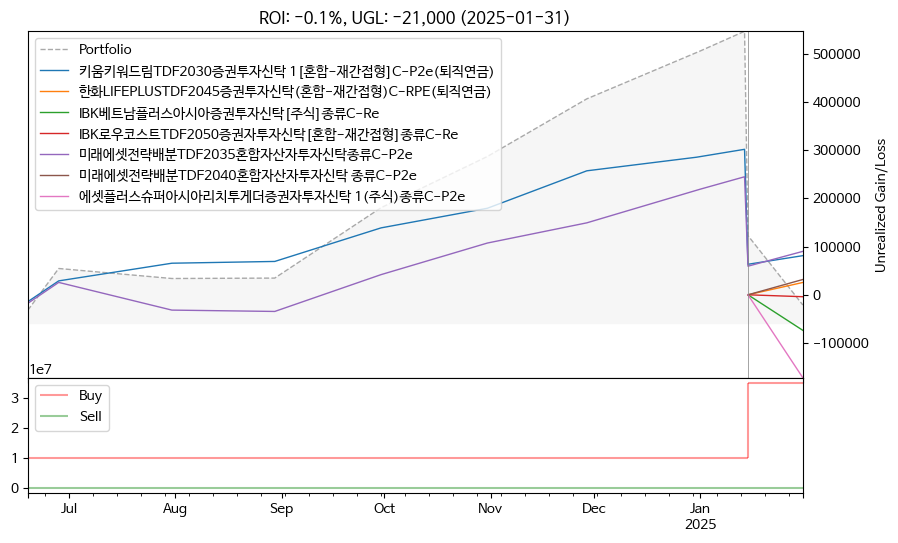

In [19]:
pf_tdf.plot(total=False, roi=False)

In [35]:
date = None
pf_tdf.valuate(date, print_msg=True, join_str=True)
#pf_tdf.valuate(date, total=False)

start, end, buy, sell, value, ugl, roi
2024-06-19, 2025-01-31, 35000000, -31926, 35010787, -21139, -0.0006039576067228269


start    2024-06-19
end      2025-01-31
buy      35,000,000
sell        -31,926
value    35,010,787
ugl         -21,139
roi       -0.000604
dtype: object

In [21]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [22]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_tdf.transaction_pipeline(**kwargs)

pf_tdf.view_record(-1)

7 tickers selected by Selected from 2025-01-31 to 2025-01-31
Weights of tickers determined by Equal weights.
Mean absolute error of weights: 0 %
ROI: 1.1%, UGL: 395,347 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                             
2025-01-31 K55206C95800    키움키워드림TDF2030증권투자신탁 1[혼합-재간접형]C-P2e(퇴직연금)      1   
           K55213C50702  한화LIFEPLUSTDF2045증권투자신탁(혼합-재간접형)C-RPE(퇴직연금)      1   
           K55234BY9966                 IBK베트남플러스아시아증권투자신탁[주식]종류C-Re      1   
           K55234DF3150        IBK로우코스트TDF2050증권자투자신탁[혼합-재간접형]종류C-Re      1   
           K55301BU6139              미래에셋전략배분TDF2035혼합자산자투자신탁종류C-P2e      1   
           K55301BU6253             미래에셋전략배분TDF2040혼합자산자투자신탁 종류C-P2e      1   
           K55364CF7048          에셋플러스슈퍼아시아리치투게더증권자투자신탁 1(주식)종류C-P2e      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2025-01-31 K55206C95800      -333329  5002379  0.1429    0.143 2025-01-31  
           K55213C50702       -23720  5001866  0.1429    0.143 2025-01-31  
           K55234BY9966        76676  5002979  0.1429    0.143 2025-01-31  
           K55234DF3150         5783  5001824  0.1429    0.143 2025-01-31  
           K55301BU6139      -294521  5001709  0.1429    0.143 2025-01-31  
           K55301BU6253       -30280  5001468  0.1429    0.143 2025-01-31  
           K55364CF7048       173532  5001523  0.1429    0.143 2025-01-31

## HANA

In [25]:
kw_st = dict(
    #tickers = ['KR5101888398', 'KR5236AS4826', 'KR5370AP9956', 'K55306CV9946']
    method_select = 'selected'    
)

In [26]:
pf_hana = PM.create_portfolio('HANA_2408', **kw_st, **kw_cost)
pf_hana.view_record()

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-08-01 loaded


name  ratio  \
date       ticker                                                       
2024-08-01 KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
           K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 KR5101888398      5020000  5020000   0.502    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000   0.242    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000   0.186    0.186 2024-08-01  
           K55306CV9946       690000   690000   0.069    0.069 2024-08-01

In [27]:
#pf_hana.portfolio_data['strategy']
#pf_hana.cost
#pf_hana.get_names()

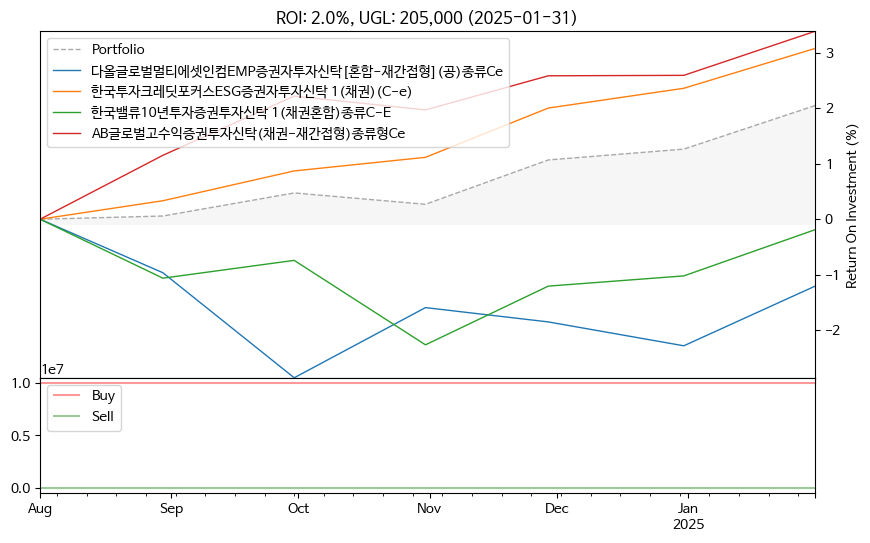

In [28]:
pf_hana.plot(total=False, roi=True)

In [29]:
date = None
pf_hana.valuate(date, print_msg=True, join_str=True)

start, end, buy, sell, value, ugl, roi
2024-08-01, 2025-01-31, 9990000, 0.0, 10194581, 204581, 0.0204785785785786


start    2024-08-01
end      2025-01-31
buy       9,990,000
sell            0.0
value    10,194,581
ugl         204,581
roi        0.020479
dtype: object

In [10]:
# set kwargs of transaction_pipeline
WidgetTransaction

In [11]:
kwargs = dict(
    date = WidgetTransaction.values(0),
    capital = WidgetTransaction.values(1),
    save = WidgetTransaction.values(2)
)
_ = pf_hana.transaction_pipeline(**kwargs)
pf_hana.view_record()

4 tickers selected by Selected from 2023-01-31 to 2025-01-31
Weights of tickers determined by Inv.Vol.
Mean absolute error of weights: 0 %
ROI: 1.6%, UGL: 175,993 (2025-01-31)
Set save=True to save transaction record


name  ratio  \
date       ticker                                                       
2024-08-01 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   
2025-01-31 K55306CV9946  다올글로벌멀티에셋인컴EMP증권자투자신탁[혼합-재간접형](공)종류Ce      1   
           KR5101888398        한국투자크레딧포커스ESG증권자투자신탁 1(채권)(C-e)      1   
           KR5236AS4826           한국밸류10년투자증권투자신탁 1(채권혼합)종류C-E      1   
           KR5370AP9956           AB글로벌고수익증권투자신탁(채권-재간접형)종류형Ce      1   

                         transaction      net  weight  weight*      date*  
date       ticker                                                          
2024-08-01 K55306CV9946       690000   690000  0.0690    0.069 2024-08-01  
           KR5101888398      5020000  5020000  0.5020    0.503 2024-08-01  
           KR5236AS4826      2420000  2420000  0.2420    0.242 2024-08-01  
           KR5370AP9956      1860000  1860000  0.1860    0.186 2024-08-01  
2025-01-31 K55306CV9946       -81429   600255  0.0589    0.059 2025-01-31  
           KR5101888398       895986  6070462  0.5955    0.596 2025-01-31  
           KR5236AS4826      -391659  2023777  0.1986    0.199 2025-01-31  
           KR5370AP9956      -425610  1497373  0.1470    0.147 2025-01-31

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [76]:
def download_commissions(self, ticker, msg=False, url=None, headers=None,
                         payload="""<?xml version="1.0" encoding="utf-8"?>
                                    <message>
                                      <proframeHeader>
                                        <pfmAppName>FS-COM</pfmAppName>
                                        <pfmSvcName>COMFundUnityBasInfoSO</pfmSvcName>
                                        <pfmFnName>fundBasInfoSrch</pfmFnName>
                                      </proframeHeader>
                                      <systemHeader></systemHeader>
                                        <COMFundUnityInfoInputDTO>
                                        <standardCd>{ticker:}</standardCd>
                                        <companyCd></companyCd>
                                        <standardDt></standardDt>
                                    </COMFundUnityInfoInputDTO>
                                    </message>""",
                           tag_iter='COMFundBasInfoOutDTO', 
                           tags={'fee':'rewSum', 'buy':'frontendCmsRate', 'sell':'backendCmsRate'}
                  ):
    # convert inputs for request
    kwargs = dict(ticker=ticker)
    df = self._download_data(payload, tag_iter, tags, url=url, headers=headers, **kwargs)
    df.index = [ticker]
    return df


def _download_data(self, payload, tag_iter, tags, 
                   url=None, headers=None, **kwargs_payload):

    url = self._check_var(url, self.url)
    headers = self._check_var(headers, self.headers)
    payload = payload.format(**kwargs_payload)
    xml = FundDownloader.fetch_data(url, headers, payload, msg=False)
    return None if xml is None else FundDownloader.parse_xml(xml, tag_iter, tags)




In [ ]:
    def update_master(self, save=True, 
                      interval=5, pause_duration=.1, msg=False):
        """
        download data and update ticker data for self.cols_check
        """
        kw = dict(interval=interval, pause_duration=pause_duration, msg=msg)
        failed = self._update_master_checks(**kw)
        failed.append(self._update_master_commissions(**kw))
        self.save_master(overwrite=True) if save else None # overwite after updating
        return failed if len(failed) > 0 else None


    def _update_master_checks(self, interval=5, pause_duration=.1, msg=False):
        """
        download data and update ticker data for self.cols_check
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR')

        col_ticker = self.col_ticker
        cols_check = self.cols_check
        cols_check_float = ['check1_price', 'check2_price']
        
        data, failed = list(), list()
        tracker = TimeTracker(auto_start=True)
        for x in tqdm(data_tickers.index):
            # download settlements history to get dates for price history
            df = self.download_settlements(x)
            if df is None:
                failed.append(x)
                continue
            else:
                cond = (df['type'] == '결산')
                start = df.loc[cond, 'start'].max()
                end = df.set_index('start').loc[start, 'end']
                
            # download date & price for conversion from rate to price
            df = self.download_price(x, start, end)
            if df is None:
                failed.append(x)
                continue
            else:
                sr = df['price']
                start = sr.index.min()
                end = sr.index.max()
                data.append([x, start, sr[start], end, sr[end]])
            
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if len(data) > 0:
            cols = [col_ticker, *cols_check]
            df = pd.DataFrame().from_records(data, columns=cols).set_index(col_ticker)
            df[cols_check_float] = df[cols_check_float].astype(float)
            data_tickers.update(df, overwrite=True)
            print('data_tickers updated with data for conversions')
            self.data_tickers = data_tickers

        if len(failed) > 0:
            print('WARNING: check output of failed')
        return failed


    def _update_master_commissions(self, interval=5, pause_duration=.1, msg=False):
        """
        download data and update ticker data for self.cols_commissions
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR')

        col_ticker = self.col_ticker
        cols_cms = self.cols_commissions
        
        df_cms, failed = None, list()
        tracker = TimeTracker(auto_start=True)
        for x in tqdm(data_tickers.index):
            df = self.download_commissions(x)
            if df is None:
                failed.append(x)
                continue
            else:
                df_cms = df if df_cms is None else pd.concat([df_cms, df])
            tracker.pause(interval=interval, pause_duration=pause_duration, msg=msg)
        tracker.stop()

        if df_cms is not None:
            df_cms[cols_cms] = df_cms[cols_cms].astype(float)
            data_tickers.update(df_cms, overwrite=True)
            print('data_tickers updated with commissions')
            self.data_tickers = data_tickers

        if len(failed) > 0:
            print('WARNING: check output of failed')
        return failed

In [77]:
file = 'test.csv'
path = path_data
fd = FundDownloader(file, path)

ERROR: failed to load test_funds_prices_241031.csv as Index ticker invalid
ERROR: no ticker data loaded yet


In [79]:
import pandas as pd

df_c = None
for t in ['K55101BZ1079', 'K55105DK2888']:
    df = download_commissions(fd, t)
    df_c = df if df_c is None else pd.concat([df_c, df])

In [80]:
df_c

,fee,buy,sell
K55101BZ1079,1.248,0,0
K55105DK2888,1.29,0,0


# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [4]:
fund = PM.create_universe('UV_FUND')

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [5]:
fd = FundDownloader.create(fund)

Data for 224 funds loaded.


In [6]:
from pf_utils import TimeTracker
from tqdm import tqdm
import pandas as pd

self = fd
fd.set_tickers()
fd.download('2000-01-01', '2025-01-01')

224 tickers set to download


100%|█████████████████████████████████████████████████████████████| 224/224 [00:26<00:00,  8.51it/s]


26.3 secs elapsed, 0.5 secs paused (1.9%)


KeyError: Timestamp('2025-01-31 00:00:00')

In [7]:
def download(self, start_date, end_date, freq='monthly', percentage=True,
             url=None, headers=None,
             interval=5, pause_duration=.1, msg=False,
             file=None, path='.'):
    """
    download rate and convert to price using prices in settlement info
    """
    data_tickers = self.data_tickers
    # download rates
    df_rates = self._get_rate(start_date, end_date, freq=freq, 
                               url=url, headers=headers, interval=interval, 
                               pause_duration=pause_duration, msg=msg)
    # convert to price
    df_prices, sr_err = self._get_prices(df_rates, data_tickers, percentage=percentage, msg=msg)
    if sr_err is not None:
        self.df_prices = df_prices
        self.save(file, path) if file is not None else None
    return sr_err

In [8]:
self = fd
start_date, end_date = '2000-01-01', '2025-01-01'
freq = 'monthly'
df_rates = self._get_rate(start_date, end_date, freq=freq, 
                               url=None, headers=None, interval=5, 
                               pause_duration=1, msg=False)

100%|█████████████████████████████████████████████████████████████| 224/224 [00:31<00:00,  7.06it/s]

31.7 secs elapsed, 6.0 secs paused (18.9%)


In [10]:
def _get_prices(self, df_rates, data_tickers, percentage=True, msg=True):
    df_prices = None
    # convert nan & NaT to None for to_dict
    data_tickers = data_tickers.map(lambda x: 0 if pd.isna(x) else x).replace(0, None)
    errors, index_errors = list(), list()
    for x in df_rates.columns:
        data = data_tickers.loc[x].to_dict()
        sr_rate = df_rates[x].dropna()
        try:
            sr_n_err = self._convert_rate(data, sr_rate, percentage=percentage, msg=msg)
        except:
            print('ERROR')
            return data, sr_rate, percentage, msg
            
        if sr_n_err is None:
            print(f'ERROR: check data for {x}')
        else:
            sr, err = sr_n_err
            df_prices = sr.to_frame() if df_prices is None else pd.concat([df_prices, sr], axis=1)
            index_errors.append(x)
            errors.append(err)
    if len(errors) > 0:
        print(f'Max error of conversions: {max(errors):.2e}')
        df_prices = df_prices.sort_index()
        sr_err = pd.Series(errors, index=index_errors, name='error')
    else:
        sr_err = None
    return df_prices, sr_err

In [12]:
self = fd
data_tickers = self.data_tickers
res = _get_prices(self, df_rates, data_tickers, percentage=True, msg=False)

ERROR


In [13]:
data, sr_rate, percentage, msg = res

In [14]:
data

{'name': '유리필라델피아반도체인덱스증권자투자신탁H[주식]ClassC-P2e',
 'buy': None,
 'sell': None,
 'fee': 0.93,
 'tax': None,
 'check1_date': Timestamp('2024-02-29 00:00:00'),
 'check1_price': 2104.12,
 'check2_date': Timestamp('2025-01-31 00:00:00'),
 'check2_price': 2372.87}

In [15]:
def _convert_rate(self, data, sr_rate, percentage=True, msg=False, price_init=1000):
    """
    calc price from rate of return
    data: dict of self.cols_check to value
    """
    unit = 100 if percentage else 1
    dt1, prc1, dt2, prc2 = [data[x] for x in self.cols_check]
    if dt1 is None: # reset all others
        rat1 = sr_rate.iloc[0]
        prc1 = price_init
        dt2 = sr_rate.index.max()
        # set price to get zero for conversion error
        prc2 = prc1 * (sr_rate.loc[dt2] + unit) / unit
    else:
        try:
            rat1 = sr_rate.loc[dt1]
        except KeyError as e:
            return print(f'ERROR: KeyError {e}') if msg else None

    # calc price from rate
    price_base = prc1 / (rat1 + unit)
    sr_price = (sr_rate + unit) * price_base 

    # calc conversion error
    e = sr_price.loc[dt2]/prc2 - 1
    print(f'error: {e:.2f}') if msg else None
    return (sr_price, e)

In [16]:
self = fd
_convert_rate(self, data, sr_rate, percentage, msg)

KeyError: Timestamp('2025-01-31 00:00:00')

In [19]:
sr_rate.index
data

{'name': '유리필라델피아반도체인덱스증권자투자신탁H[주식]ClassC-P2e',
 'buy': None,
 'sell': None,
 'fee': 0.93,
 'tax': None,
 'check1_date': Timestamp('2024-02-29 00:00:00'),
 'check1_price': 2104.12,
 'check2_date': Timestamp('2025-01-31 00:00:00'),
 'check2_price': 2372.87}

In [22]:
df_rates.to_csv(f'{path_data}/test_df_rates.csv')

In [72]:
#tkr = 'K55301BU6139'
tkr = 'KR5301AK6274'
tkr = 'KR5301AT1987'
self = fd
data_tickers = fd.data_tickers.map(lambda x: 0 if pd.isna(x) else x).replace(0, None)
data = data_tickers.loc[tkr, self.cols_check].to_dict()
sr_rate = df_rates[tkr]
res = _convert_rate(self, data, sr_rate, msg=True)

error: 0.00


In [64]:
sr_price, dt2, prc2, prc1, sr_rate, unit = res

In [65]:
prc2 = prc1 * (sr_rate.loc[dt2] + unit)/unit
prc2

1077.7

In [67]:
(sr_rate.loc[dt2] + unit)

107.77

In [68]:
sr_price.loc[dt2]/prc2 - 1

0.0

<Axes: xlabel='date'>

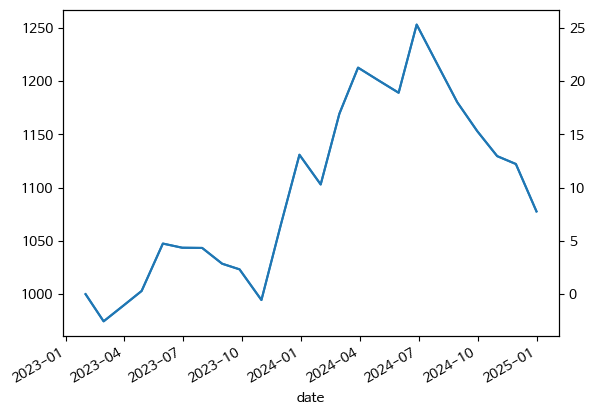

In [45]:
sr_price, e = res
ax = sr_price.plot()
_ = sr_rate.plot(ax=ax.twinx())

In [31]:
sr_rate

date
2024-01-31     0.00
2024-02-29     2.47
2024-03-29     5.74
2024-04-30     4.61
2024-05-31     6.98
2024-06-28     9.93
2024-07-31     8.67
2024-08-30     8.61
2024-09-30    10.28
2024-10-31    11.70
2024-11-29    12.61
2024-12-31    14.09
Name: K55301BU6139, dtype: float64

In [32]:
dt1

Timestamp('2023-03-31 00:00:00')

# testing

In [1]:
from pf_utils import PortfolioManager as PM 
from pf_utils import FinancialRatios, METRICS, FundDownloader
from pf_widgets import WidgetUniverse, WidgetTransaction, w_date

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
path_data = 'data'
path_tran = 'transaction'

In [3]:
file_cost='transaction_cost'
kw_cost = {'cost': file_cost}

In [4]:
from pf_utils import PortfolioData, DataManager
universe = 'UV_FUND'
pfd = PortfolioData()
universe_data = pfd.review_universe(universe)
dm = DataManager(**universe_data)

64 securities from 2008-11-28 to 2025-01-31 uploaded.
ERROR: 10 tickers duplicated
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [5]:
dm.upload(dm.file_historical, get_names=True, convert_to_daily=True)

64 securities from 2008-11-28 to 2025-01-31 uploaded.
REMINDER: 64 equities converted to daily
Daily metrics in Performance statistics must be meaningless
Price data loaded


In [12]:
#dm.get_names()
dm._get_tickers()

ERROR: tickers K55105BH1010, K55301BM7459, K55301BM7640, K55213C51049, K55301BM7731, K55301BM8051, K55213C51262, K55101BT4394, K55105BS2072, K55370BU1979 duplicated
ERROR: Failed to get ticker names as name 'tickres' is not defined


In [14]:
dm._get_tickers_fund()

ERROR: tickers K55105BH1010, K55301BM7459, K55301BM7640, K55213C51049, K55301BM7731, K55301BM8051, K55213C51262, K55101BT4394, K55105BS2072, K55370BU1979 duplicated


NameError: name 'tickres' is not defined

In [19]:
def _get_tickers_fund(self, tickers=None, path=None, col_name='name', overwrite=False, **kw):
    """
    self.fickers: file name for tickers
    """
    file = self.tickers # file of tickers
    path = self._check_var(path, self.path)
    # run check_master after update_master to get duplicates
    fd = FundDownloader(file, path, check_master=False, msg=False)
    return fd
    
    fd.update_master(save=True, overwrite=overwrite)
    if fd.check_master() is not None:
        return None # return None if duplicates exist
    security_names = fd.data_tickers[col_name].to_dict()
    return self._check_tickers(security_names, tickers)

In [20]:
from pf_utils import FundDownloader
fd = _get_tickers_fund(dm)

In [21]:
fd.update_master(save=True, overwrite=False)

0it [00:00, ?it/s]


0.0 secs elapsed, 0.0 secs paused (0.0%)


0it [00:00, ?it/s]

0.0 secs elapsed, 0.0 secs paused (0.0%)
funds_info_250205.csv saved


In [22]:
    def update_master(self, save=True, overwrite=False,
                      interval=5, pause_duration=.1, msg=False):
        """
        update & save the master file
        overwrite: set to False to update only update values that are NA
        """
        data_tickers = self.data_tickers
        if data_tickers is None:
            return print('ERROR: No data_tickers available')
            
        kw = dict(interval=interval, pause_duration=pause_duration, 
                  msg=msg, overwrite=overwrite)
        data_tickers = self._update_master_checks(data_tickers, **kw)
        if data_tickers is None:
            return None # see _update_master_checks for err msg
            
        data_tickers = self._update_master_commissions(data_tickers, **kw)
        if data_tickers is None:
            return None # see _update_master_checks for err msg
            
       # update before saving
        self.data_tickers = data_tickers 
        # overwite only file with name of today
        self.save_master(overwrite=True) if save else None 
        return None

# testing

In [16]:
file = 'kospi200_ratios.csv'
df_ratio = FinancialRatios.util_get_ratio('PER', file, path_data)

Financial ratios of 200 stocks from 2023-01-02 to 2025-02-03 loaded


In [17]:
pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio, **kw_cost)
#pf_per = PM.create_portfolio('PER_2410', df_additional=df_ratio)

200 securities from 2022-01-03 to 2025-02-03 uploaded.
Price data loaded
Cost data transaction_cost_241217.csv loaded
Transaction record to 2024-11-11 loaded
Run check_universe to get the list of missing assets


In [23]:
pf_per.valuate(total=False)

,start,end,buy,sell,value,ugl,roi
ticker,,,,,,,
003030,2024-10-17,2025-02-03,"986,736","771,780","442,736","227,780",0.230842
138930,2024-11-11,2025-02-03,"518,669",0.0,"601,933","83,264",0.160534
139130,2024-11-11,2025-02-03,"519,769",0.0,"577,359","57,590",0.110799
241560,2024-11-11,2025-02-03,"520,019",0.0,"571,520","51,501",0.099037
024110,2024-11-11,2025-02-03,"509,969",0.0,"534,653","24,684",0.048404
111770,2024-11-11,2025-02-03,"481,818",0.0,"501,536","19,718",0.040925
017800,2024-11-11,2025-02-03,"416,715",0.0,"426,035","9,320",0.022365
005850,2024-11-11,2025-02-03,"501,618",0.0,"509,904","8,286",0.016518
316140,2024-11-11,2025-02-03,"514,579",0.0,"519,562","4,983",0.009684


In [30]:
pf_per.record_halt
pf_per.tradinghalts.record_halt

In [26]:
pf_per.df_rec

name     ratio  transaction      net  weight      date*  \
date       ticker                                                               
2024-10-17 003030   세아제강지주  0.995439       986700   986700    0.20 2024-10-17   
           009970  영원무역홀딩스  1.006742       979000   979000    0.20 2024-10-17   
           010060   OCI홀딩스  0.992504       933800   933800    0.20 2024-10-17   
           047040     대우건설  1.000000      1019940  1019940    0.20 2024-10-17   
2024-11-11 000270       기아  1.010684       468000   468000    0.05 2024-11-11   
           001450     현대해상  1.000000       505750   505750    0.05 2024-11-11   
           003030   세아제강지주  0.994309      -773200   386600    0.05 2024-11-11   
           005380      현대차  1.007160       419000   419000    0.05 2024-11-11   
           005830   DB손해보험  1.016838       427600   427600    0.05 2024-11-11   
           005850      에스엘  1.014354       501600   501600    0.05 2024-11-11   
           009970  영원무역홀딩스  0.997666      -514200   428500    0.05 2024-11-11   
           010060   OCI홀딩스  1.006689      -358800   478400    0.05 2024-11-11   
           017800   현대엘리베이  1.084233       416700   416700    0.05 2024-11-11   
           024110     기업은행  1.002059       509950   509950    0.05 2024-11-11   
           047040     대우건설  0.993122      -461645   508900    0.05 2024-11-11   
           078930       GS  1.002404       499200   499200    0.05 2024-11-11   
           088350     한화생명  1.001745       515700   515700    0.05 2024-11-11   
           111770     영원무역  0.996264       481800   481800    0.05 2024-11-11   
           138930  BNK금융지주  1.003181       518650   518650    0.05 2024-11-11   
           139130  DGB금융지주  1.004848       519750   519750    0.05 2024-11-11   
           241560     두산밥캣  0.995000       520000   520000    0.05 2024-11-11   
           316140   우리금융지주  1.001244       514560   514560    0.05 2024-11-11   
2025-01-06 000270       기아  1.000000            0   468000    0.05 2025-01-06   
           001450     현대해상  1.000000            0   505750    0.05 2025-01-06   
           003030   세아제강지주  1.000000            0   386600    0.05 2025-01-06   
           005380      현대차  1.000000            0   419000    0.05 2025-01-06   
           005830   DB손해보험  1.000000            0   427600    0.05 2025-01-06   
           005850      에스엘  1.000000            0   501600    0.05 2025-01-06   
           009970  영원무역홀딩스  1.000000            0   428500    0.05 2025-01-06   
           010060   OCI홀딩스  1.000000            0   478400    0.05 2025-01-06   
           017800   현대엘리베이  1.000000            0   416700    0.05 2025-01-06   
           024110     기업은행  1.000000            0   509950    0.05 2025-01-06   
           047040     대우건설  1.000000            0   508900    0.05 2025-01-06   
           078930       GS  1.000000            0   499200    0.05 2025-01-06   
           088350     한화생명  1.000000            0   515700    0.05 2025-01-06   
           111770     영원무역  1.000000            0   481800    0.05 2025-01-06   
           138930  BNK금융지주  1.000000            0   518650    0.05 2025-01-06   
           139130  DGB금융지주  1.000000            0   519750    0.05 2025-01-06   
           241560     두산밥캣  1.000000            0   520000    0.05 2025-01-06   
           316140   우리금융지주  1.000000            0   514560    0.05 2025-01-06   

                   price  
date       ticker         
2024-10-17 003030    NaN  
           009970    NaN  
           010060    NaN  
           047040    NaN  
2024-11-11 000270    NaN  
           001450    NaN  
           003030    NaN  
           005380    NaN  
           005830    NaN  
           005850    NaN  
           009970    NaN  
           010060    NaN  
           017800    NaN  
           024110    NaN  
           047040    NaN  
           078930    NaN  
           088350    NaN  
           111770    NaN  
           138930    NaN  
           139130    NaN  
           241560    NaN 

In [94]:
a = {1:1, 2:2}
a.pop(3, False)
a

{1: 1, 2: 2}

In [95]:
a.pop(1, False)

1

In [97]:
a.pop(3, False)

False